In [1]:
import yfinance as yfin
yfin.pdr_override()
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
pdr.__version__

'0.10.0'

In [3]:
import yfinance as yf 
df_tesla = yf.download('TSLA', start='2017-02-01', end='2022-02-24')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-01,16.870001,16.879999,16.603333,16.615999,16.615999,59382000
2017-02-02,16.556000,16.827999,16.514000,16.770000,16.770000,37497000
2017-02-03,16.794001,16.812000,16.645332,16.755333,16.755333,32800500
2017-02-06,16.733334,17.188000,16.708668,17.184668,17.184668,53437500
2017-02-07,17.212667,17.333332,17.094667,17.165333,17.165333,63672000
...,...,...,...,...,...,...
2022-02-16,304.683319,308.809998,300.403320,307.796661,307.796661,51294300
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700


### Simple Moving Average (SMA)

<AxesSubplot:xlabel='Date'>

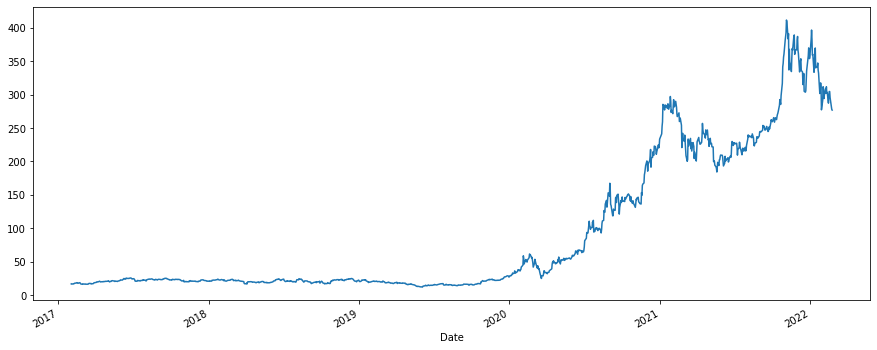

In [5]:
df_tesla['Open'].plot(figsize=(15,6))

In [6]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()
df_tesla['Open:10 days rolling']

Date
2017-02-01     16.870001
2017-02-02     16.713000
2017-02-03     16.740000
2017-02-06     16.738334
2017-02-07     16.833200
                 ...    
2022-02-16    301.238663
2022-02-17    302.280664
2022-02-18    301.906665
2022-02-22    298.917999
2022-02-23    296.414667
Name: Open:10 days rolling, Length: 1275, dtype: float64

<AxesSubplot:xlabel='Date'>

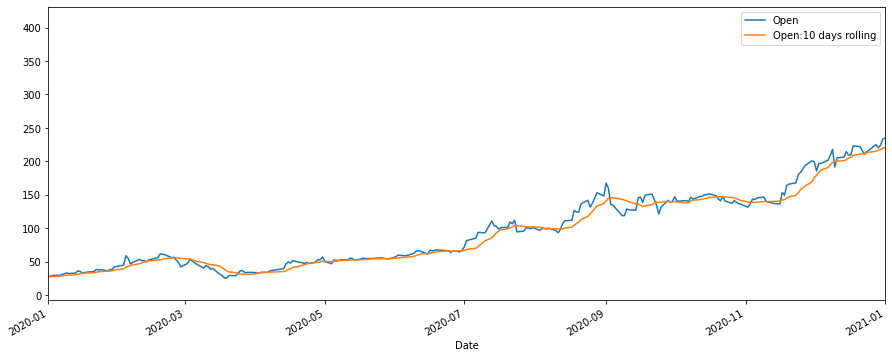

In [7]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [8]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

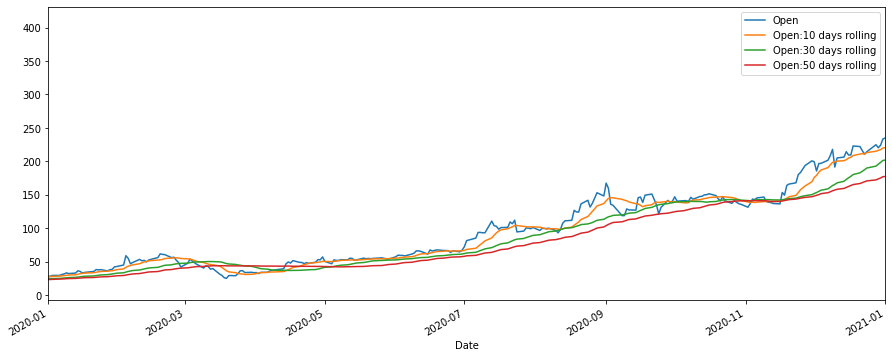

In [9]:
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

### Cummlative Moving Average (CMA)

### Expanding

<AxesSubplot:xlabel='Date'>

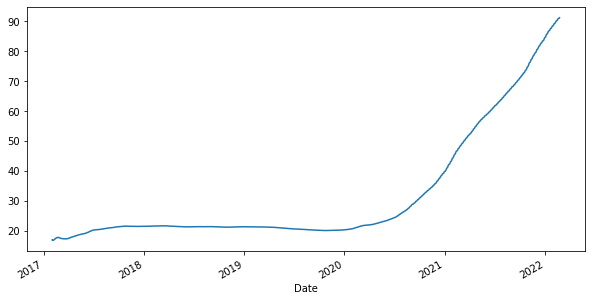

In [10]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

#### Since we have lag in simple moving average so there is way EWMA - Exponential weight Moving Average

In [11]:
# EWMA = Exponential Weight Moving Average 

In [12]:
# EMA tesla shares
# Let's smoothing facor - 0.1
df_tesla['EMA_0.1']=df_tesla["Open"].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

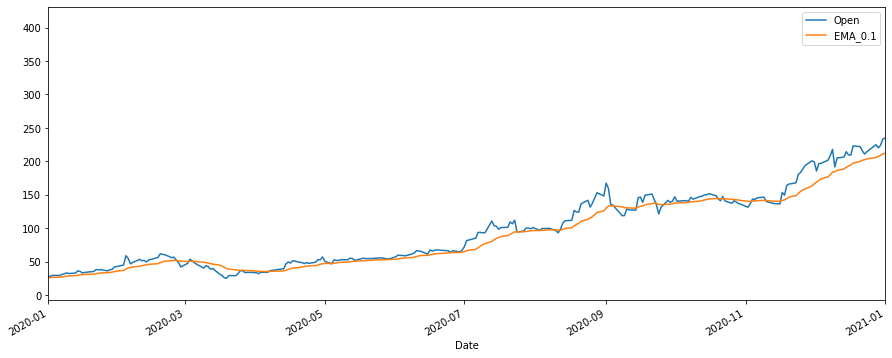

In [13]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [14]:
# Note :
# here we are removing lags in EMA

<AxesSubplot:xlabel='Date'>

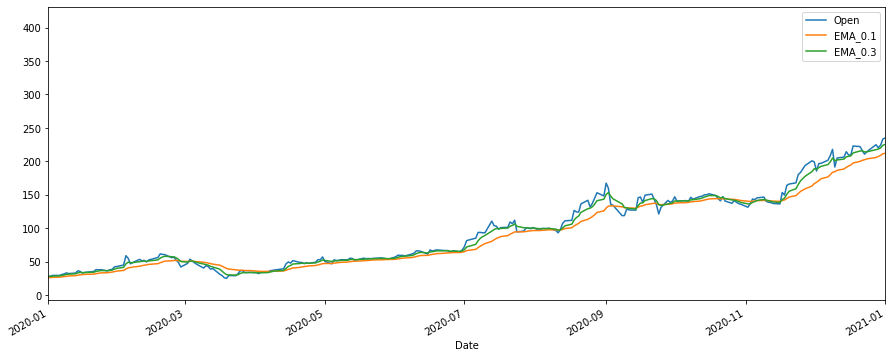

In [15]:
df_tesla['EMA_0.3']=df_tesla["Open"].ewm(alpha=0.3,adjust=False).mean()
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

#### Note : green is better than Orange becase it towards to orange line

## EWMA

In [16]:
df_tesla['EMA_5days']=df_tesla["Open"].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

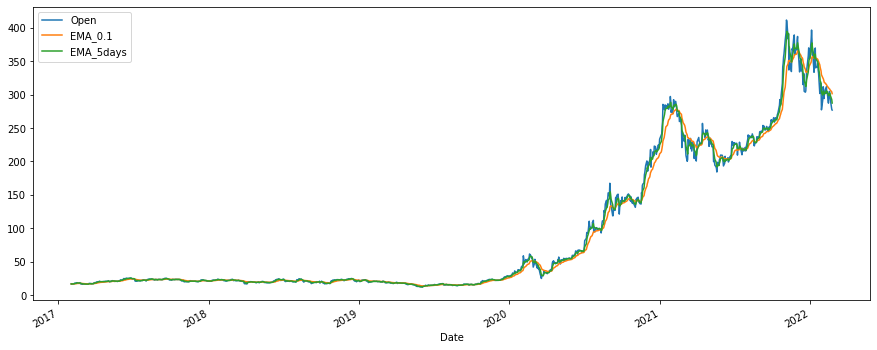

In [17]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(figsize=(15,6))

In [18]:
# Note 
# EWMA is best from all 